# Group Connection Testing


In this notebook we will be testing whether the hemispheres/segments come from an stochastic block model, which models graphs containing communities, in which subsets of nodes within each community are characterized as being connected to each other with particular edge densities. Here, our communities are determined by the classes of the neurons within each hemisphere/segment, which we are considering can be interneuron, motorneuron, or sensory neuron.

In [1]:
import logging
import pandas as pd
import numpy as np
import csv
import networkx as nx
import itertools
import seaborn as sns
from pathlib import Path
from networkx import from_pandas_adjacency
from itertools import chain, combinations
from matplotlib import pyplot as plt
from collections import namedtuple
from graspologic.inference import group_connection_test
from graspologic.plot import heatmap, adjplot
from pkg.platy import _get_folder, load_connectome_normal_lcc_annotations, load_left_adj, load_right_adj, load_head_adj, load_pygidium_adj, load_0_adj, load_1_adj, load_2_adj, load_3_adj


/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder = _get_folder()
annotations = load_connectome_normal_lcc_annotations()
folder

PosixPath('/Users/kareefullah/Desktop/NeuroData/neurodata/platy-data/docs/outputs/5_11_23')

The following blocks of code generate dataframes, where the skids_df represent the skids of interest in the hemispheres/segments and labels_df represent the corresponding labels of the classes of the neurons

In [3]:
#get indices from left and right
skids_hemis = {"l": [], "r": []}
skids_hemis_list = []
for key in skids_hemis:
    for i in range(len(annotations["skids"])):
        if annotations["side"][i] == key:
            skids_hemis[key].append(annotations["skids"][i])
            skids_hemis_list.append(annotations["skids"][i])
skids_hemis_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in skids_hemis.items()]))
skids_hemis_df.to_csv(folder / "skids_hemis.csv")
skids_hemis_df
            

,l,r
0,2015233,1769485.0
1,1548290,1622033.0
2,1318919,2007060.0
3,2015241,1064990.0
4,1564703,1728563.0
...,...,...
1047,1277932,NaN
1048,1630186,NaN
1049,1302513,NaN
1050,1376251,NaN


In [4]:
skids_hemis_with_class = {"l": [], "r": []}
labels_hemis_with_class = {"l": [], "r": []}
poss_labels = ["s", "i", "m"]

#add skids and labels for hemis;
for key in skids_hemis_with_class:
    for i in range(len(annotations["skids"])):

        #check if the skid is in the left/right adj (normal, lcc), and the side is left or right, and the class exists as sensory, motor, or inter
        if(annotations["skids"][i] in skids_hemis_list and annotations["side"][i]==key and annotations["class"][i] in poss_labels):
            skids_hemis_with_class[key].append(annotations["skids"][i])
            labels_hemis_with_class[key].append(annotations["class"][i])

#convert dicts to dataframes
skids_hemis_with_class_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in skids_hemis_with_class.items()]))
labels_hemis_with_class_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in labels_hemis_with_class.items()]))
skids_hemis_with_class_df.to_csv(folder / "skids_hemis_classes.csv")
labels_hemis_with_class_df.to_csv(folder / "labels_hemis_classes.csv")

print(len(skids_hemis_with_class["l"]))
print(len(skids_hemis_with_class["r"]))

918
872


In [5]:
#get indices from left and right
skids_segs = {"head": [], "pygidium": [], "1": [], "2": [], "3": []}
skids_segs_list = []

for key in skids_segs:
    for i in range(len(annotations["skids"])):
        if annotations["segment"][i] == key:
            skids_segs[key].append(annotations["skids"][i])
            skids_segs_list.append(annotations["skids"][i])
skids_segs_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in skids_segs.items()]))
skids_segs_df.to_csv(folder / "skids_segs.csv")
skids_segs_df

,head,pygidium,1,2,3
0,2015233,1278185.0,1548290.0,1728563.0,1622033.0
1,1318919,1335777.0,1458234.0,1466424.0,1728550.0
2,2015241,1335790.0,1433691.0,1065030.0,1417265.0
3,2007060,1335807.0,1376350.0,1441872.0,1417276.0
4,1064990,1335832.0,1433701.0,1646725.0,1507391.0
...,...,...,...,...,...
743,2015193,NaN,NaN,NaN,NaN
744,180202,NaN,NaN,NaN,NaN
745,1343467,NaN,NaN,NaN,NaN
746,1302513,NaN,NaN,NaN,NaN


In [6]:
skids_segs_with_class = {"head": [], "pygidium": [], "1": [], "2": [], "3": []}
labels_segs_with_class = {"head": [], "pygidium": [], "1": [], "2": [], "3": []}

for key in skids_segs:
    for i in range(len(annotations["skids"])):
        if(annotations["skids"][i] in skids_segs_list and annotations["segment"][i]==key and annotations["class"][i] in poss_labels):
            skids_segs_with_class[key].append(annotations["skids"][i])
            labels_segs_with_class[key].append(annotations["class"][i])

skids_segs_with_class_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in skids_segs_with_class.items()]))
labels_segs_with_class_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in labels_segs_with_class.items()]))
skids_segs_with_class_df.to_csv(folder / "skids_segs_classes.csv")
labels_segs_with_class_df.to_csv(folder / "labels_segs_classes.csv")
print(skids_segs_with_class_df)

        head   pygidium          1          2          3
0    2015233  1278185.0  1548290.0  1728563.0  1622033.0
1    1318919  1335777.0  1376350.0  1466424.0  1728550.0
2    2015241  1335790.0   827510.0  1065030.0  1417265.0
3    2007060  1335807.0   557195.0  1441872.0  1417276.0
4    1064990  1335832.0   942233.0  1646725.0  1507391.0
..       ...        ...        ...        ...        ...
681  1122238        NaN        NaN        NaN        NaN
682  2015193        NaN        NaN        NaN        NaN
683  1343467        NaN        NaN        NaN        NaN
684  1302513        NaN        NaN        NaN        NaN
685  1376251        NaN        NaN        NaN        NaN

[686 rows x 5 columns]


In [115]:
new_folder = Path.joinpath(folder, "group_connection_plots")
new_folder

PosixPath('/Users/kareefullah/Desktop/NeuroData/neurodata/platy-data/docs/outputs/group_connection_plots')

In [116]:
#comparison for hemis
count_hemis = {"l" : {"s": 0, "i": 0, "m": 0}, "r": {"s": 0, "i": 0, "m": 0}}

for key in count_hemis:
    for i in range(len(labels_hemis_with_class[key])):
        count_hemis[key][labels_hemis_with_class[key][i]] += 1

# get the lists of number of skids for y values, x values are the keys
keys = poss_labels # "s", "i", "m"
list_counts_hemis = []
class_label_hemis = []
hemi_label = []
class_label_full = ["Sensory", "Inter", "Motor"]
# loop through "l" and "r"
for key in count_hemis:
    # loop through "s", "i", "m"
    for inner_key in count_hemis[key]:
        # append "Sensory", "Inter" or "Motor" depending on inner key
        for i in range(len(class_label_full)):
            if inner_key == class_label_full[i][0].lower():
                class_label_hemis.append(class_label_full[i])
        # add 1 to the count of the respective class label in the respective key of count_hemis
        list_counts_hemis.append(count_hemis[key][inner_key])
        # append the outer key from count_hemis
        hemi_label.append(key)

label_counts = list(zip(class_label_hemis, list_counts_hemis, hemi_label))
df_hemis = pd.DataFrame(label_counts, columns = ["class", "count", "side"])
#df_hemis.to_csv(new_folder / "hemi_classes_counts.csv")
df_hemis

,class,count,side
0,Sensory,283,l
1,Inter,478,l
2,Motor,108,l
3,Sensory,272,r
4,Inter,497,r
5,Motor,121,r


We make barplots for the counts of each of the classes across the hemispheres/segments using the dictionaries we generated above

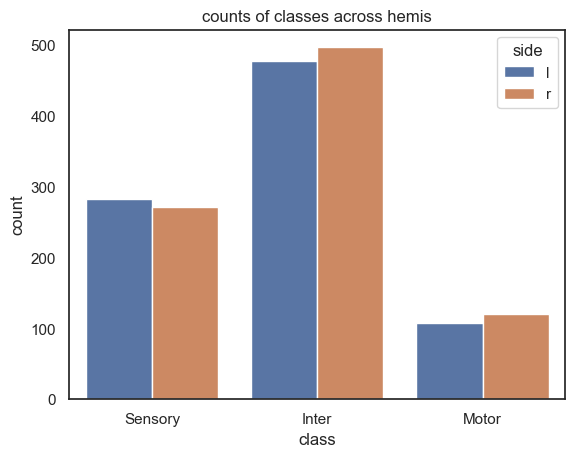

In [117]:
sns.set(style="white")
sns.barplot(x="class", y="count", hue="side", data=df_hemis)
plt.title("counts of classes across hemis")
#plt.savefig(new_folder / "hemi_classes_barplot.png")

In [118]:

#comparison for segments
count_segs = {"head" : {"s": 0, "i": 0, "m": 0},
              "pygidium": {"s": 0, "i": 0, "m": 0},
              "1" : {"s": 0, "i": 0, "m": 0},
              "2" : {"s": 0, "i": 0, "m": 0},
              "3" : {"s": 0, "i": 0, "m": 0},}

for key in count_segs:
    for i in range(len(labels_segs_with_class[key])):
        count_segs[key][labels_segs_with_class[key][i]] += 1
print(count_segs)
# get the lists of number of skids for y values, x values are the keys
keys = poss_labels # "s", "i", "m"
list_counts_segs = []
class_label_segs = []
segs_label = []
# loop through "l" and "r"
for key in count_segs:
    # loop through "s", "i", "m"
    for inner_key in count_segs[key]:
        # append "Sensory", "Inter" or "Motor" depending on inner key
        for i in range(len(class_label_full)):
            if inner_key == class_label_full[i][0].lower():
                class_label_segs.append(class_label_full[i])
        # add 1 to the count of the respective class label in the respective key of count_hemis
        list_counts_segs.append(count_segs[key][inner_key])
        # append the outer key from count_hemis
        segs_label.append(key)

label_counts_segs = list(zip(class_label_segs, list_counts_segs, segs_label))
df_segs = pd.DataFrame(label_counts_segs, columns = ["class", "count", "segment"])
#df_segs.to_csv(new_folder / "segs_classes_counts.csv")
df_segs

{'head': {'s': 375, 'i': 432, 'm': 20}, 'pygidium': {'s': 44, 'i': 18, 'm': 2}, '1': {'s': 35, 'i': 163, 'm': 58}, '2': {'s': 44, 'i': 203, 'm': 83}, '3': {'s': 42, 'i': 152, 'm': 66}}


,class,count,segment
0,Sensory,375,head
1,Inter,432,head
2,Motor,20,head
3,Sensory,44,pygidium
4,Inter,18,pygidium
5,Motor,2,pygidium
6,Sensory,35,1
7,Inter,163,1
8,Motor,58,1
9,Sensory,44,2


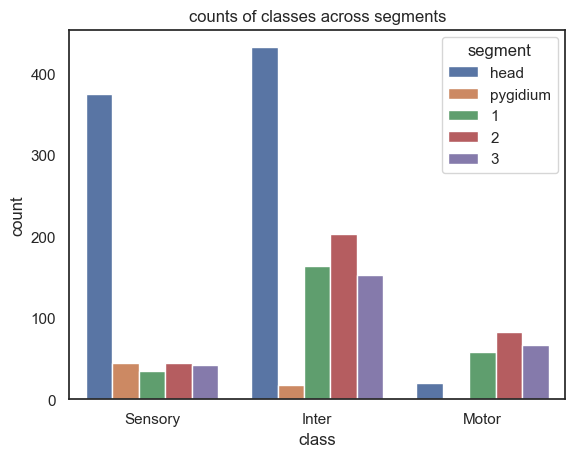

In [119]:
sns.set(style="white")
sns.barplot(x="class", y="count", hue="segment", data=df_segs)
plt.title("counts of classes across segments")
#plt.savefig(new_folder / "segs_classes_barplot.png")

We will now visualize the adjs of the hemispheres/segments, in which the nodes will be grouped into communities of sensory, motor, or interneurons

In [120]:
#block for loading adjs/labels
from pkg.platy import load_left_adj_labels_with_class, load_right_adj_labels_with_class, load_head_adj_labels_with_class, load_pygidium_adj_labels_with_class, load_1_adj_labels_with_class, load_2_adj_labels_with_class, load_3_adj_labels_with_class
#hemis
left_adj, left_labels = load_left_adj_labels_with_class()
right_adj, right_labels = load_right_adj_labels_with_class()

#segments
head_adj, head_labels = load_head_adj_labels_with_class()
pyg_adj, pyg_labels = load_pygidium_adj_labels_with_class()
#adj_0, labels_0 = load_0_adj_labels()
adj_1, labels_1 = load_1_adj_labels_with_class()
adj_2, labels_2 = load_2_adj_labels_with_class()
adj_3, labels_3 = load_3_adj_labels_with_class()
len(right_adj)

890

In [121]:
#lists for adjs/labels/names
hemi_adjs = [left_adj, right_adj]
for i, val in enumerate(hemi_adjs):
    hemi_adjs[i] = val.to_numpy()

segment_adjs = [head_adj, pyg_adj, adj_1, adj_2, adj_3]
for i, val in enumerate(segment_adjs):
    segment_adjs[i] = val.to_numpy()
all_adjs = hemi_adjs + segment_adjs

hemi_labels = [left_labels, right_labels]
segment_labels = [head_labels, pyg_labels, labels_1, labels_2, labels_3]
all_labels = hemi_labels + segment_labels

hemi_names = ["left", "right"]
segment_names = ["head", "pygidium", "1", "2", "3"]
all_names = hemi_names + segment_names
len(all_labels[0])


869

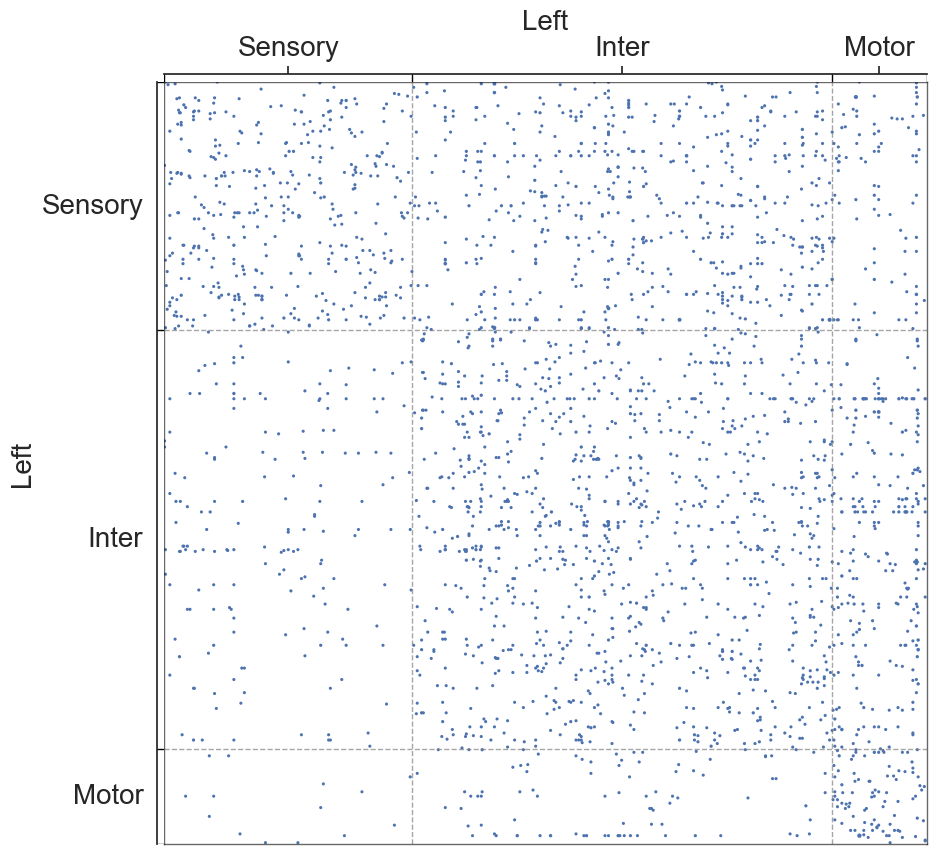

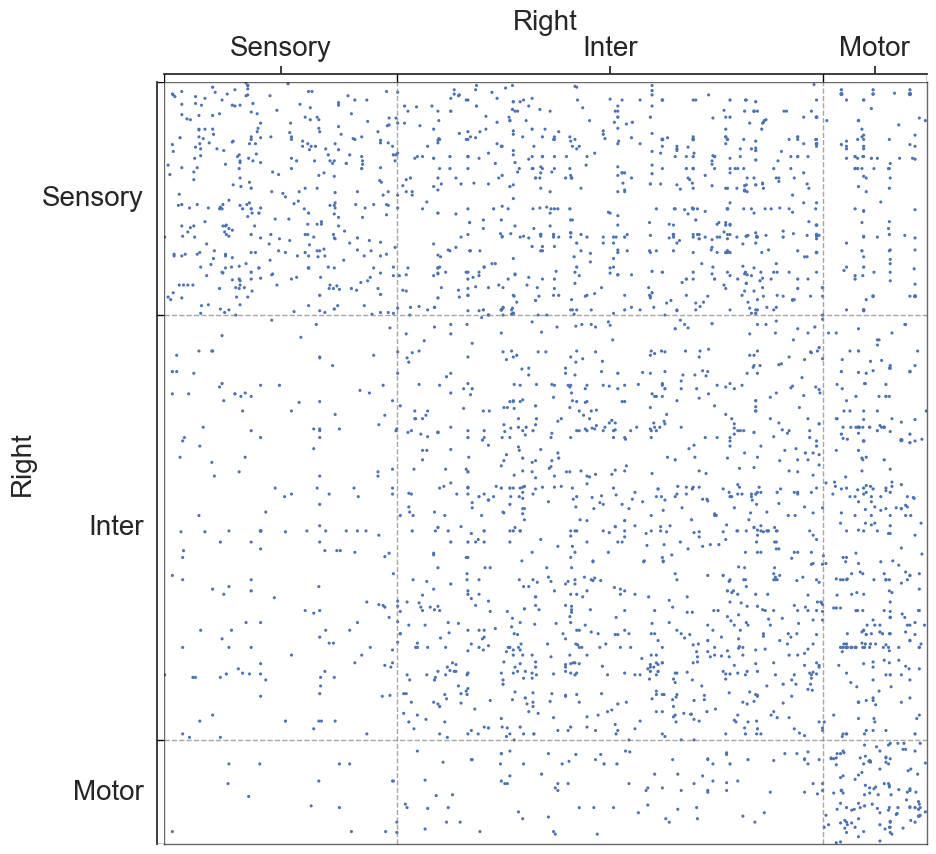

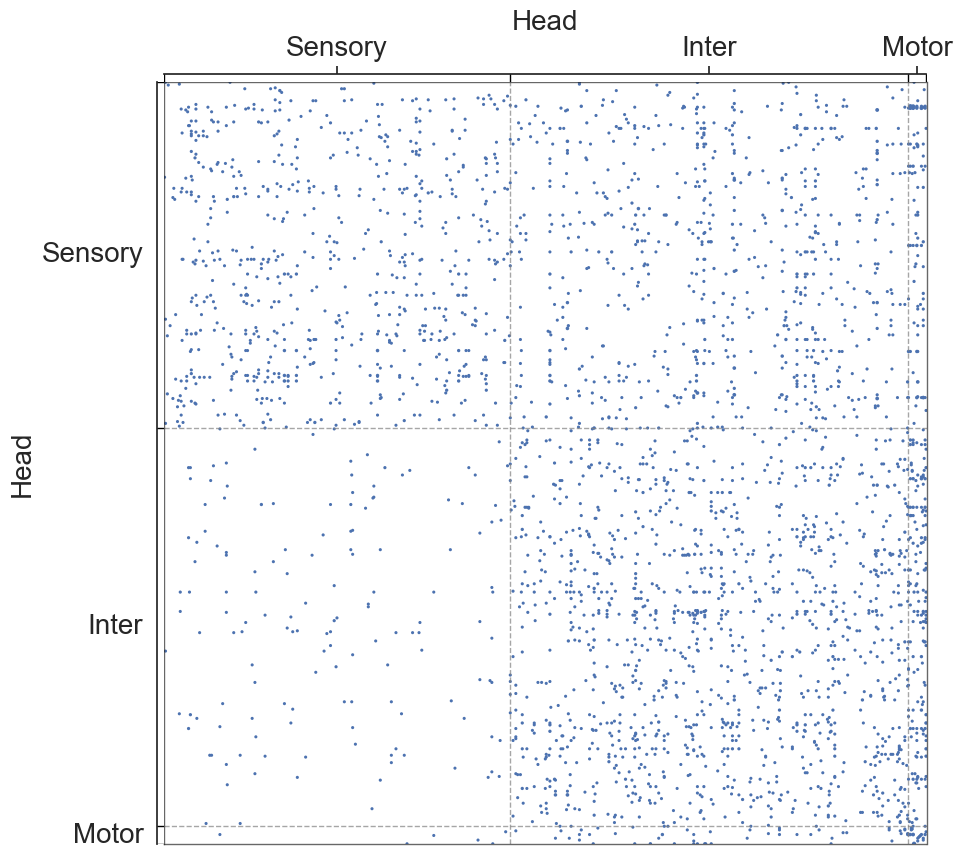

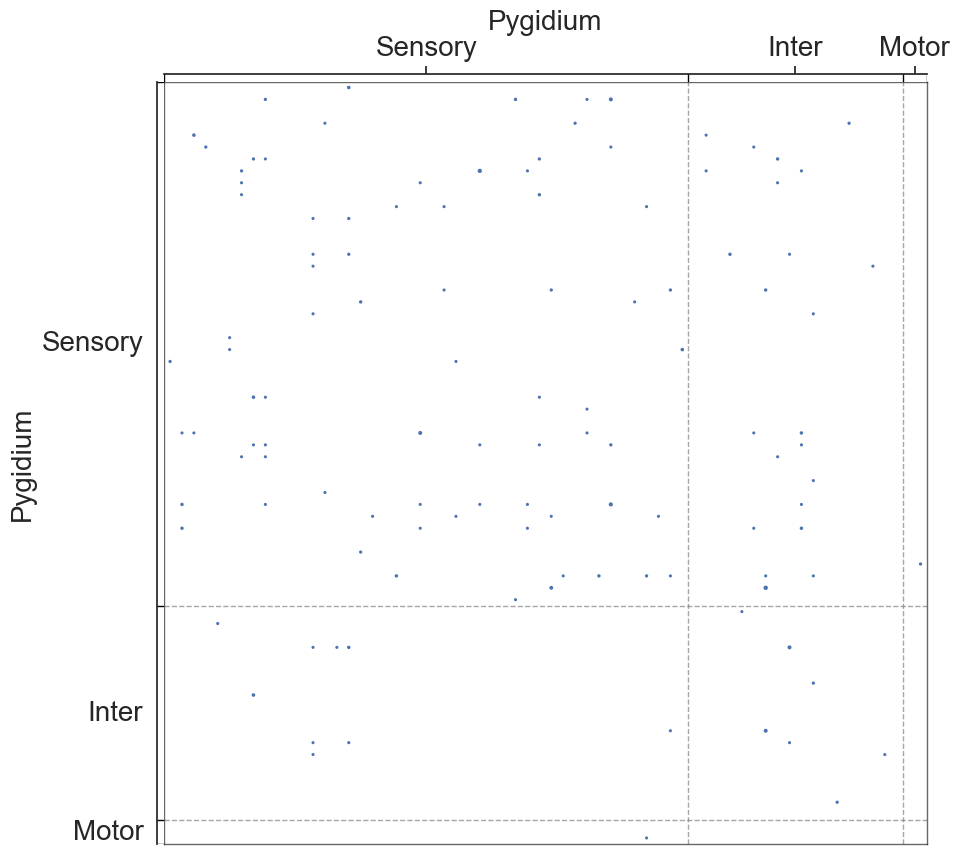

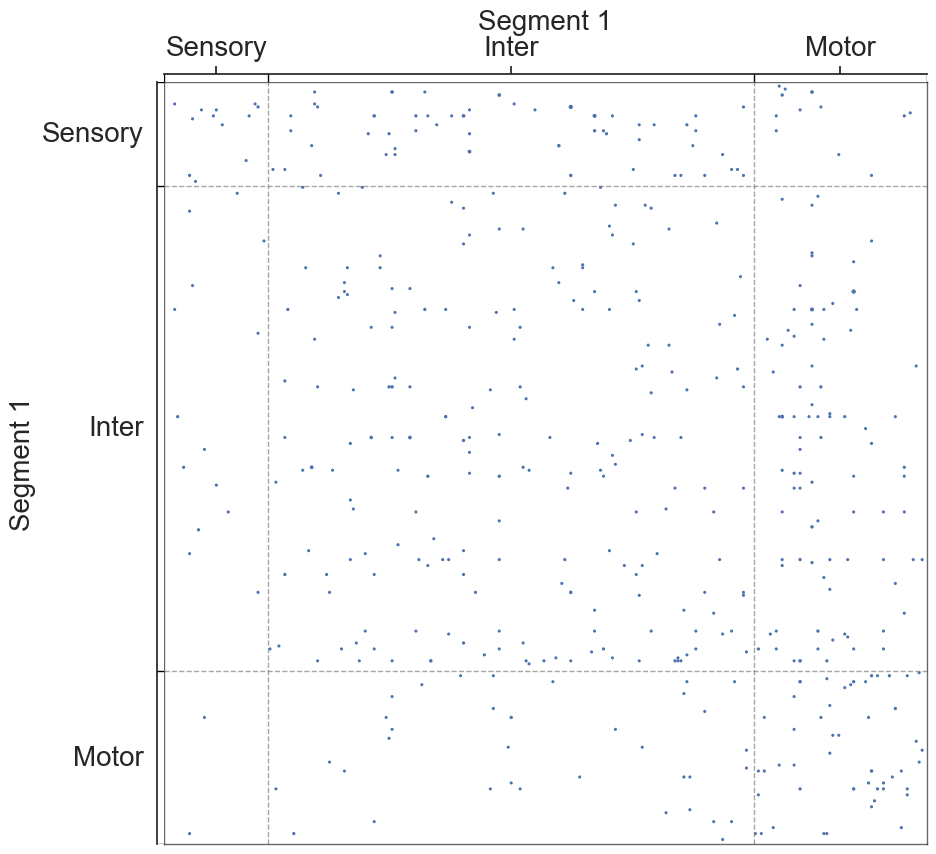

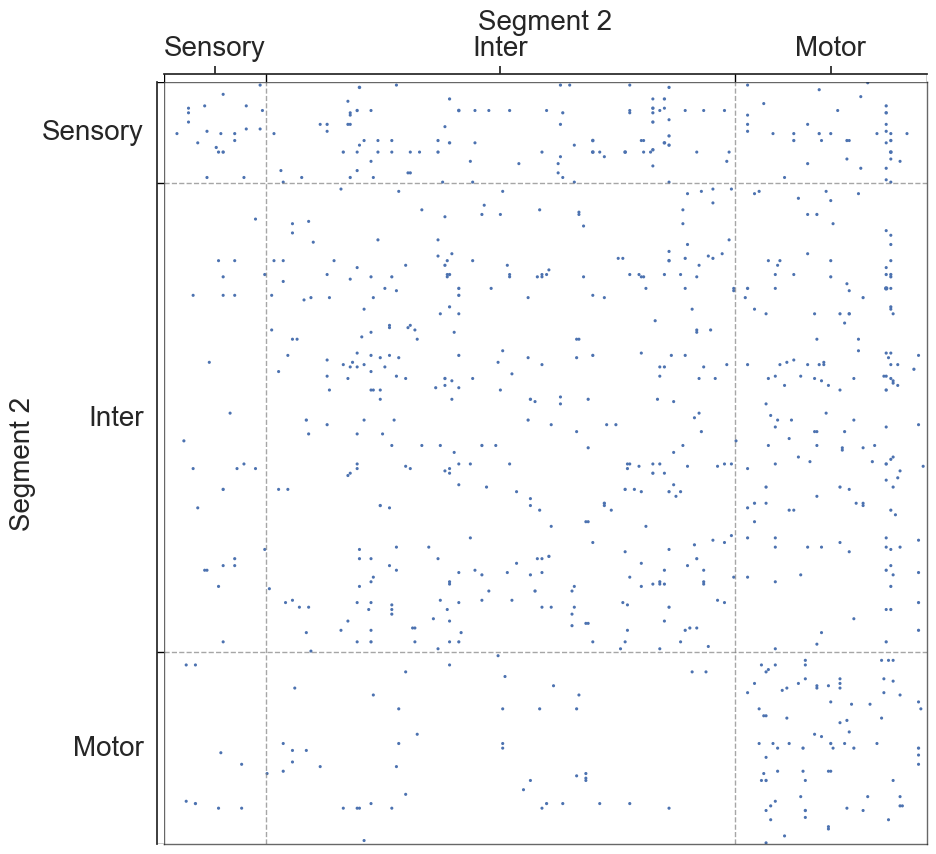

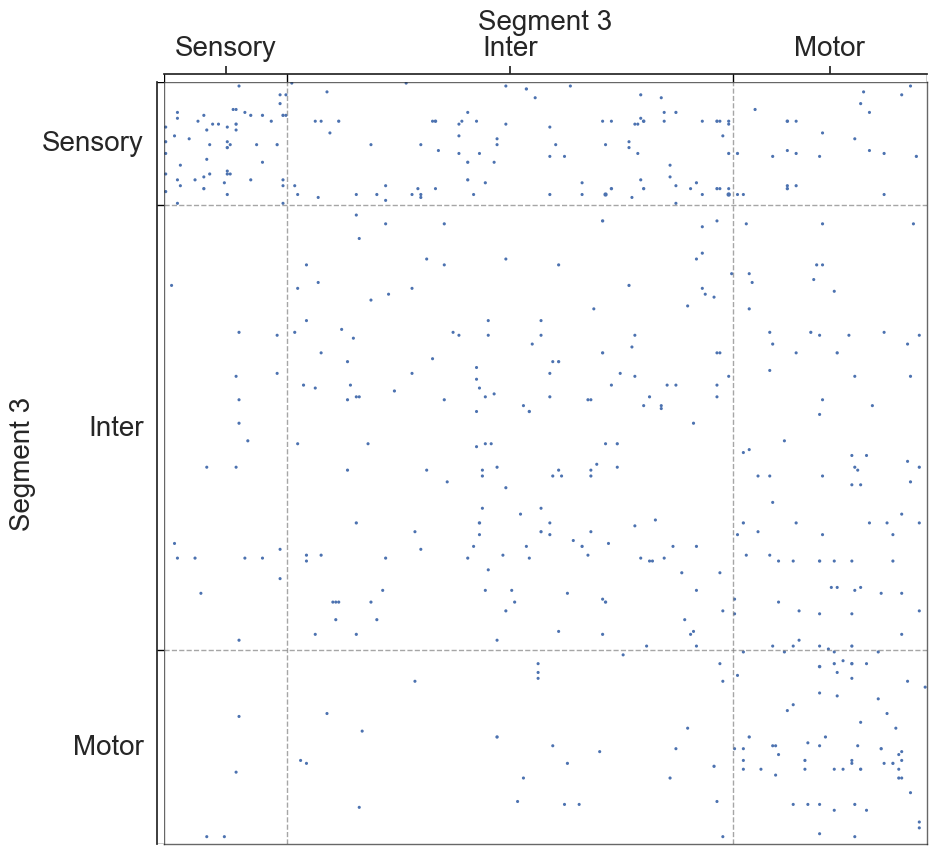

In [122]:
#scatterplots

#format segment names
all_names_format = []
for i in range(len(all_names)):
    if(all_names[i].isnumeric()):
        all_names_format.append(f"Segment {all_names[i]}")

    else:
        all_names_format.append(all_names[i].capitalize())
#metadata
metas = []
for i in range(len(all_adjs)):

    label_list = []
    order_list = []
    for j in range(len(all_labels[i])):

        #change s, i, m to Sensory, Inter, Motor
        if all_labels[i][j] == "s":
            label_list.append("Sensory")
            order_list.append(0)

        elif all_labels[i][j] == "i":
            label_list.append("Inter")
            order_list.append(1)
        
        elif all_labels[i][j] == "m":
            label_list.append("Motor")
            order_list.append(2)

    #format name
    name = all_names[i].capitalize()
    metas.append(pd.DataFrame(
        data={
              "{}".format(all_names_format[i]): label_list,
              "{}_order".format(all_names_format[i]): order_list
        },
))

for i in range(len(all_adjs)):
    #group_order parameter - make all s have group order 0 etc
    adjplot(all_adjs[i], plot_type="scattermap", meta=metas[i], group=["{}".format(all_names_format[i])], group_order=["{}_order".format(all_names_format[i])])
    #plt.savefig(new_folder / "scatterplots" / "connection_{}".format(all_names[i]))

In [123]:
print(len(metas[3]))
print(len(all_adjs[3]))

64
64


Group Connection Test for Left and Right Hemispheres

In [124]:
stat, pval, misc = group_connection_test(hemi_adjs[0], hemi_adjs[1], hemi_labels[0], hemi_labels[1])
pval

0.17973133834812552

We do the same for all the pairwise combinations of segments

In [125]:
pairwise_labels = list(itertools.combinations(segment_labels, 2))
pairwise_adjs = list(itertools.combinations(segment_adjs, 2))
pairwise_names = list(itertools.combinations(segment_names, 2))
#initialize dataframe
zero_data = np.zeros(shape=(len(segment_names), len(segment_names)))
pval_df = pd.DataFrame(zero_data, columns=segment_names, index=segment_names)
pval_list = []

thres = 1e-12

for label, adjs, name in zip(pairwise_labels, pairwise_adjs, pairwise_names):
    stat, pval, misc = group_connection_test(adjs[0], adjs[1], label[0], label[1])

    #lower limit
    if pval<thres:
        pval = thres
    
    pval_df[name[0]][name[1]] = pval
    pval_df[name[1]][name[0]] = pval
pval_df.to_csv(folder / "group_connection_plots" / "group_connection_test_pvals_segments.csv")
pval_df

,head,pygidium,1,2,3
head,0.000000e+00,1.000000e-12,1.369996e-07,6.508011e-11,1.000000e-12
pygidium,1.000000e-12,0.000000e+00,1.811977e-06,6.861601e-08,1.372898e-02
1,1.369996e-07,1.811977e-06,0.000000e+00,5.014156e-01,9.994344e-04
2,6.508011e-11,6.861601e-08,5.014156e-01,0.000000e+00,1.748496e-04
3,1.000000e-12,1.372898e-02,9.994344e-04,1.748496e-04,0.000000e+00


Let's use bonferroni's correction on the segment p-values to reduce the chances of obtaining false positive results since we are using multiple pairwise tests

In [126]:
#bonferroni correction for non-density adjusted p-vals
from statsmodels.stats.multitest import multipletests
np_pvals = pval_df.to_numpy().flatten()
corrected_pvals = multipletests(np_pvals)[1].reshape((len(segment_names), len(segment_names)))
pvals_df_bonferroni_corrected = pd.DataFrame(corrected_pvals, columns=segment_names, index=segment_names)
pvals_df_bonferroni_corrected

,head,pygidium,1,2,3
head,0.000000e+00,2.000000e-11,0.000002,1.041282e-09,2.000000e-11
pygidium,2.000000e-11,0.000000e+00,0.000018,9.606236e-07,5.379534e-02
1,1.643994e-06,1.811963e-05,0.000000,7.514136e-01,5.981643e-03
2,1.041282e-09,9.606236e-07,0.751414,0.000000e+00,1.397941e-03
3,2.000000e-11,5.379534e-02,0.005982,1.397941e-03,0.000000e+00


Now, let's use the density adjusted version of group connection tests, which accounts for the potential difference in density across the adjs (are the group-to-group connection probabilities of one adj simply a scaled-up version of those of the other)

In [127]:
stat, pval, misc = group_connection_test(hemi_adjs[0], hemi_adjs[1], hemi_labels[0], hemi_labels[1], density_adjustment=True)
pval

0.30062118611352096

In [128]:
pairwise_labels = list(itertools.combinations(segment_labels, 2))
pairwise_adjs = list(itertools.combinations(segment_adjs, 2))
pairwise_names = list(itertools.combinations(segment_names, 2))
#initialize dataframe
zero_data = np.zeros(shape=(len(segment_names), len(segment_names)))
pval_df_density_correct = pd.DataFrame(zero_data, columns=segment_names, index=segment_names)
pval_list = []
for label, adjs, name in zip(pairwise_labels, pairwise_adjs, pairwise_names):
    stat, pval, misc = group_connection_test(adjs[0], adjs[1], label[0], label[1], density_adjustment=True)

    #lower limit
    if pval<thres:
        pval = thres
        
    pval_df_density_correct[name[0]][name[1]] = pval
    pval_df_density_correct[name[1]][name[0]] = pval
pval_df_density_correct.to_csv(folder / "group_connection_plots" / "group_connection_test_pvals_segments_density_adjust.csv")
pval_df_density_correct

,head,pygidium,1,2,3
head,0.000000e+00,0.157497,1.000000e-12,7.815448e-11,1.000000e-12
pygidium,1.574973e-01,0.000000,9.542290e-01,9.930344e-01,9.677709e-01
1,1.000000e-12,0.954229,0.000000e+00,5.152833e-01,6.521193e-03
2,7.815448e-11,0.993034,5.152833e-01,0.000000e+00,4.933269e-04
3,1.000000e-12,0.967771,6.521193e-03,4.933269e-04,0.000000e+00


Using Bonferroni's correction for the density adjusted segments:

In [129]:
np_pvals_density_correct = pval_df_density_correct.to_numpy().flatten()
corrected_pvals_density_correct = multipletests(np_pvals_density_correct)[1].reshape((len(segment_names), len(segment_names)))
pvals_df_density_corrected_bonferroni_corrected = pd.DataFrame(corrected_pvals_density_correct, columns=segment_names, index=segment_names)
pvals_df_density_corrected_bonferroni_corrected

,head,pygidium,1,2,3
head,0.000000e+00,0.819817,2.000000e-11,1.250472e-09,2.000000e-11
pygidium,8.198174e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00
1,2.000000e-11,1.000000,0.000000e+00,9.969528e-01,7.550773e-02
2,1.250472e-09,1.000000,9.969528e-01,0.000000e+00,6.884473e-03
3,2.000000e-11,1.000000,7.550773e-02,6.884473e-03,0.000000e+00


The following functions will allow us to visualize the p-values of the segments in a heatmap, where significant p-values are denoted with an X

In [130]:
from matplotlib.transforms import Bbox
def shrink_axis(ax, scale=0.7, shift=0):
    pos = ax.get_position()
    mid = (pos.ymax + pos.ymin) / 2
    height = pos.ymax - pos.ymin
    new_pos = Bbox(
        [
            [pos.xmin, mid - scale * 0.5 * height - shift],
            [pos.xmax, mid + scale * 0.5 * height - shift],
        ]
    )
    ax.set_position(new_pos)

In [131]:
import matplotlib as mpl
#cmap = mpl.colormaps["RdBu"]

In [132]:
from seaborn.utils import relative_luminance
from pkg.plot import bound_texts
import matplotlib as mpl
def plot_pvals(df, names, density_correct=True, bonferroni_correct=False, ax=None, thres=None, title=None):
    if ax is None:
        width_ratios = [0.5, 3, 10]
        fig, axs = plt.subplots(
            1,
            3,
            figsize=(10, 10),
            gridspec_kw=dict(
                width_ratios=width_ratios,
            ),
        )
        axs[1].remove()
        ax = axs[-1]
        cax = axs[0]
    
    plot_pvalues = np.log10(df)
    plot_pvalues.replace(-np.inf, 0, inplace=True)
    im = sns.heatmap(
        plot_pvalues,
        ax=ax,
        cmap="RdBu",
        center=0,
        square=True,
        cbar=False,
        fmt="s",
    )

    if title is not None:
        title = title
    else:
        title = "Group Connection p-values segments"
        if density_correct == True:
            title += " (density adjusted)"

        if bonferroni_correct == True:
            title += " (bonferroni)"

    ax.set(ylabel="Source group", xlabel="Target group", title=title)
    ax.set(xticks=np.arange(len(names)) + 0.5, xticklabels=names)
    
    colors = im.get_children()[0].get_facecolors()
    #print(colors)
    shrink_axis(cax, scale=0.5, shift=0.05)
    
    fig = ax.get_figure()

    
    if thres is None:
        cb = fig.colorbar(
            im.get_children()[0],
            cax=cax,
            fraction=1,
            shrink=1,
            ticklocation="left",
        )

    else:
        """
        cb = fig.colorbar(
            im.get_children()[0],
            cax=cax,
            fraction=1,
            shrink=1,
            ticks=np.linspace(np.log10(thres), 0, 4), #[-12, -8, -4, 0]
            ticklocation="left",
        )
        """
        
        
        cmap = mpl.cm.RdBu
        vmax=0
        vmin=np.log10(thres)
        center=0
        vrange = max(vmax - center, center - vmin)
        normlize = mpl.colors.Normalize(center - vrange, center + vrange)
        cmin, cmax = normlize([vmin, vmax])
        cc = np.linspace(cmin, cmax, 256)
        cmap = mpl.colors.ListedColormap(cmap(cc))

        fig.colorbar(mpl.cm.ScalarMappable(norm=normlize, cmap=cmap),
        cax=cax, orientation='vertical')
        
        texts = []
        texts.append(ax.text(-0.6, -0.15, "log10 p-val thres", transform=ax.transAxes))
        texts.append(ax.text(-0.6, -0.23, f"of {np.log10(thres)}", transform=ax.transAxes))
        
        bound_texts(
            texts, ax=ax, facecolor="white", edgecolor="lightgrey", xpad=0.2, ypad=0.4
        )
    
    cax.set_title(r"$log_{10}$" + "\ncorrected" "\np-value", pad=20)
    
    cax.plot(
        [0, 1], [np.log10(0.05), np.log10(0.05)], zorder=100, color="black", linewidth=3
    )
    
    cax.annotate(
        r"$\alpha$",
        (0.05, np.log10(0.05)),
        xytext=(-5, 0),
        textcoords="offset points",
        va="center",
        ha="right",
        arrowprops={"arrowstyle": "-", "linewidth": 3, "relpos": (0, 0.5)},
    )
    
    #make X's
    pad=0.2
    for idx, color in enumerate(colors):
        i, j = np.unravel_index(idx, (len(names), len(names)))
        if i!=j and np.log(df[names[i]][names[j]]) < np.log(0.05):
            lum = relative_luminance(color)
            text_color = ".15" if lum > 0.408 else "w"

            xs = [j + pad, j + 1 - pad]
            ys = [i + pad, i + 1 - pad]
            ax.plot(xs, ys, color=text_color, linewidth=4)
            xs = [j + 1 - pad, j + pad]
            ys = [i + pad, i + 1 - pad]
            ax.plot(xs, ys, color=text_color, linewidth=4)
    

In [133]:
thres_2 = 1e-8 * 1e-4
print(thres_2)
np.linspace(np.log10(thres_2), 0, 7)

1e-12


array([-12., -10.,  -8.,  -6.,  -4.,  -2.,   0.])

/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


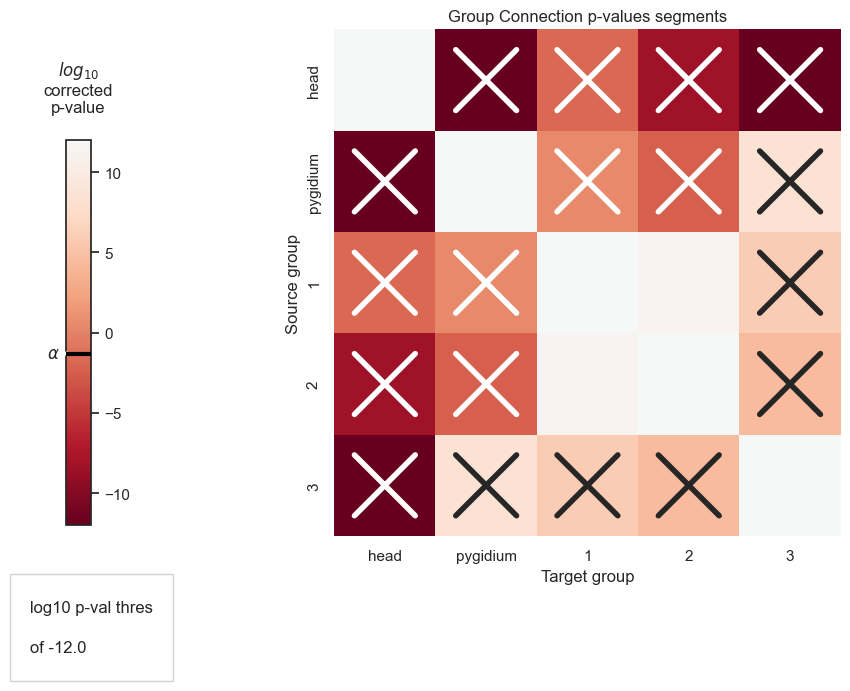

In [134]:
plot_pvals(df=pval_df, names=segment_names, density_correct=False, bonferroni_correct=False, thres=thres)
#plt.savefig(new_folder / "group_connection_heatmap_segments")

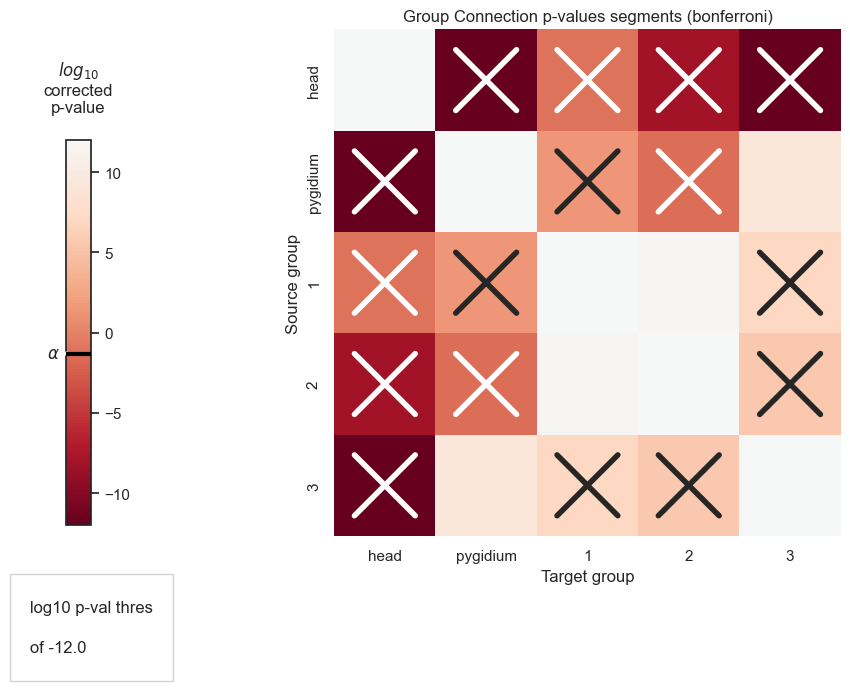

In [135]:
plot_pvals(df=pvals_df_bonferroni_corrected, names=segment_names, density_correct=False, bonferroni_correct=True, thres=thres)
plt.savefig(new_folder / "group_connection_heatmap_segments_bonferroni_corrected")

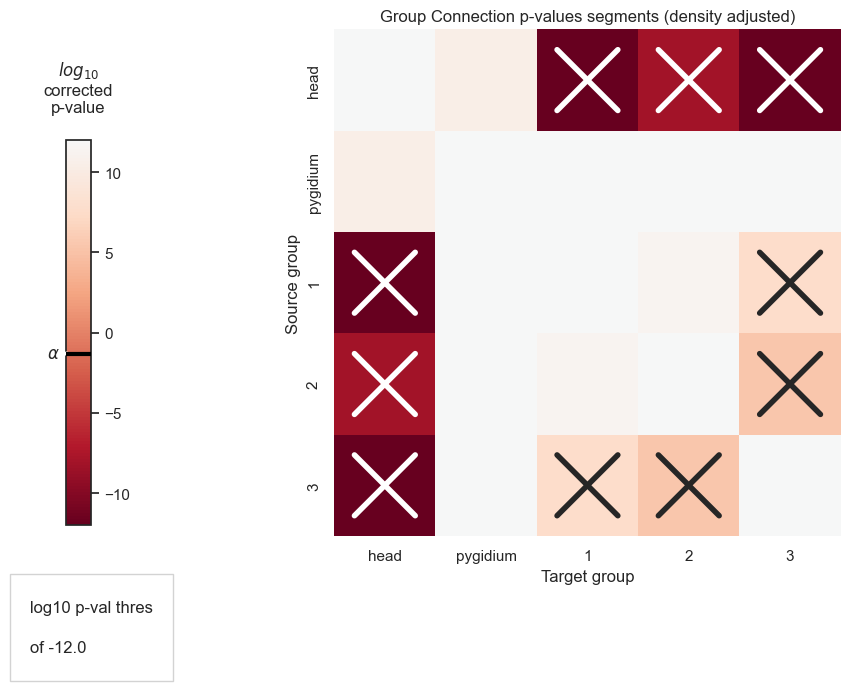

In [136]:
plot_pvals(df=pval_df_density_correct, names=segment_names, density_correct=True, thres=thres)
plt.savefig(new_folder / "group_connection_heatmap_segments_density_adjusted")

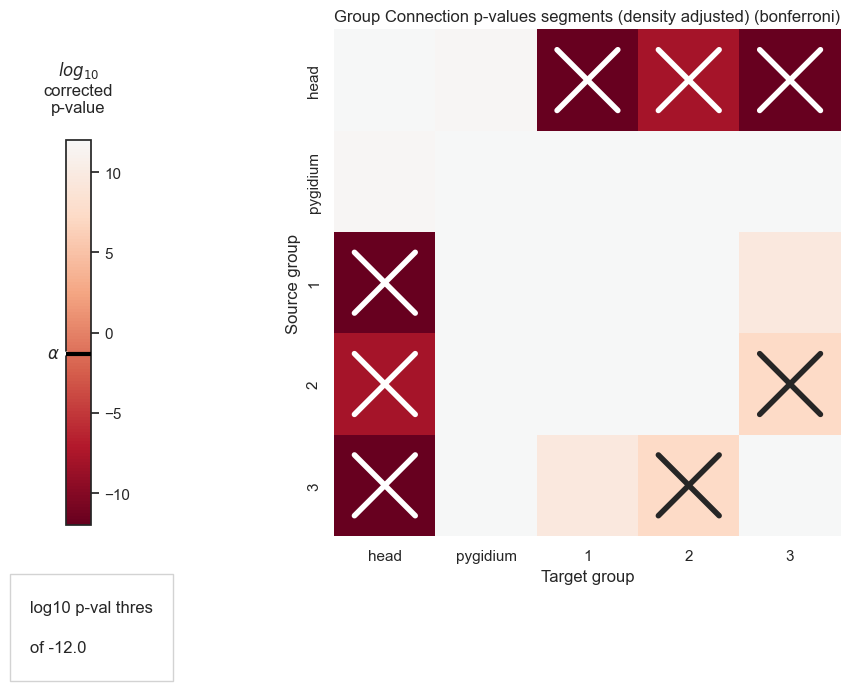

In [137]:
plot_pvals(df=pvals_df_density_corrected_bonferroni_corrected, names=segment_names, density_correct=True, bonferroni_correct=True, thres=thres)
plt.savefig(new_folder / "group_connection_heatmap_segments_density_adjusted_bonferroni_corrected")

The following section will look at comparisons of the B matrices of left vs right, and of the head, seg 1, and seg 2 using the density adjusted test

In [138]:
from pkg.plot import plot_stochastic_block_probabilities, set_theme, bound_texts
from pkg.data import load_network_palette, load_node_palette, load_unmatched
neutral_color = sns.color_palette("Set2")[2]
network_palette, NETWORK_KEY = load_network_palette()

In [139]:
def plot_stochastic_block_probabilities(misc, network_palette, name1, name2):
    # get values
    B1 = misc["probabilities1"]
    B2 = misc["probabilities2"]
    null_odds = misc["null_ratio"]
    B2 = B2 * null_odds

    p_max = max(B1.values.max(), B2.values.max())
    K = B1.shape[0]

    # set up plot
    pad = 2
    width_ratios = [0.5, pad + 0.8, 10, pad, 10]
    set_theme(font_scale=1.25)
    fig, axs = plt.subplots(
        1,
        len(width_ratios),
        figsize=(20, 10),
        gridspec_kw=dict(
            width_ratios=width_ratios,
        ),
    )
    left_col = 2
    right_col = 4
    # pvalue_col = 6

    heatmap_kws = dict(
        cmap="Blues", square=True, cbar=False, vmax=p_max, fmt="s", xticklabels=True
    )

    # heatmap of left connection probabilities
    annot = np.full((K, K), "")
    annot[B1.values == 0] = 0
    ax = axs[left_col]
    sns.heatmap(B1, ax=ax, annot=annot, **heatmap_kws)
    ax.set(ylabel="Source group", xlabel="Target group")
    first_text = r"$\hat{B}$ "
    first_text = first_text + name1
    ax.set_title(first_text, fontsize="xx-large", color=network_palette["Left"])

    # heatmap of right connection probabilities
    annot = np.full((K, K), "")
    annot[B2.values == 0] = 0
    ax = axs[right_col]
    im = sns.heatmap(B2, ax=ax, annot=annot, **heatmap_kws)
    ax.set(ylabel="", xlabel="Target group")
    second_text = r"$\hat{B}$ "
    second_text = second_text + name2
    if null_odds != 1:
        second_text = r"$c$" + second_text
    ax.set_title(second_text, fontsize="xx-large", color=network_palette["Right"])
    # ax.set(yticks=[], yticklabels=[])

    # handle the colorbars
    # NOTE: did it this way cause the other options weren't playing nice with auto
    # constrain
    # layouts.

    ax = axs[0]
    shrink_axis(ax, scale=0.5)
    _ = fig.colorbar(
        im.get_children()[0],
        cax=ax,
        fraction=1,
        shrink=1,
        ticklocation="left",
    )
    ax.set_title("Estimated\nedge\nprobability", y=1.1)

    # remove dummy axes
    for i in range(len(width_ratios)):
        if not axs[i].has_data():
            axs[i].set_visible(False)

    ax = axs[left_col]
    """
    texts = []
    texts.append(ax.text(-0.6, -0.15, "0 - No edges", transform=ax.transAxes))
    texts.append(ax.text(-0.51, -0.23, "observed", transform=ax.transAxes))

    bound_texts(
        texts, ax=ax, facecolor="white", edgecolor="lightgrey", xpad=0.2, ypad=0.8
    )
    """

    return fig, axs

In [140]:
def plot_estimated_probabilities(misc, name1, name2):
    B1 = misc["probabilities1"]
    B2 = misc["probabilities2"]
    null_odds = misc["null_ratio"]
    B2 = B2 * null_odds
    B1_ravel = B1.values.ravel()
    B2_ravel = B2.values.ravel()
    arange = np.arange(len(B1_ravel))
    sum_ravel = B1_ravel + B2_ravel
    sort_inds = np.argsort(-sum_ravel)
    B1_ravel = B1_ravel[sort_inds]
    B2_ravel = B2_ravel[sort_inds]

    fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
    ax = axs[0]
    sns.scatterplot(
        x=arange,
        y=B1_ravel,
        color=network_palette["Left"],
        ax=ax,
        linewidth=0,
        s=15,
        alpha=0.5,
    )
    sns.scatterplot(
        x=arange,
        y=B2_ravel,
        color=network_palette["Right"],
        ax=ax,
        linewidth=0,
        s=15,
        alpha=0.5,
        zorder=-1,
    )
    ax.text(
        0.7,
        0.8,
        f"{name1}",
        color=network_palette["Left"],
        transform=ax.transAxes,
    )
    ax.text(
        0.7,
        0.7,
        f"{name2}",
        color=network_palette["Right"],
        transform=ax.transAxes,
    )
    ax.set_yscale("log")
    ax.set(
        ylabel="Estimated probability " + r"($\hat{p}$)",
        xticks=[],
        xlabel="Sorted group pairs",
    )
    ax.spines["bottom"].set_visible(False)

    ax = axs[1]
    diff = B1_ravel - B2_ravel
    yscale = np.max(np.abs(diff))
    yscale *= 1.05
    sns.scatterplot(
        x=arange, y=diff, ax=ax, linewidth=0, s=25, color=neutral_color, alpha=1
    )
    ax.axhline(0, color="black", zorder=-1)
    ax.spines["bottom"].set_visible(False)
    ax.set(
        xticks=[],
        ylabel=r"$\hat{p}_{left} - \hat{p}_{right}$",
        xlabel="Sorted group pairs",
        ylim=(-yscale, yscale),
    )
    n_greater = np.count_nonzero(diff > 0)
    n_total = len(diff)
    ax.text(
        0.3,
        0.8,
        f"{name1} connection stronger ({n_greater}/{n_total})",
        color=network_palette["Left"],
        transform=ax.transAxes,
    )
    n_lesser = np.count_nonzero(diff < 0)
    ax.text(
        0.3,
        0.15,
        f"{name2} connection stronger ({n_lesser}/{n_total})",
        color=network_palette["Right"],
        transform=ax.transAxes,
    )

    fig.text(0.02, 0.905, "A)", fontweight="bold", fontsize=30)
    fig.text(0.02, 0.49, "B)", fontweight="bold", fontsize=30)

    return fig, ax

In [141]:
#test with left and right
np_left = np.array(left_adj)
np_right = np.array(right_adj)
stat, pvalue, misc_lr = group_connection_test(
    np_left,
    np_right,
    labels1=left_labels,
    labels2=right_labels,
    density_adjustment=True
)

In [142]:
#function to rename and realign misc["probabilities1"] and misc["probabilities2"]

names = ["Sensory", "Inter", "Motor"]

def convert_misc_format_prob(misc):

    #probabilities1 and probabilities2
    zero_data = np.zeros(shape=(len(names), len(names)))
    B1 = pd.DataFrame(zero_data, columns=names, index=names)
    B2 = pd.DataFrame(zero_data, columns=names, index=names)
    for i in range(len(B1)):
        for j in range(len(B1.columns)):
            B1[names[i]][names[j]] = misc["probabilities1"][names[i][0].lower()][names[j][0].lower()]
            B2[names[i]][names[j]] = misc["probabilities2"][names[i][0].lower()][names[j][0].lower()]
    return B1, B2


In [143]:
#format B1 and B2
B1_lr, B2_lr = convert_misc_format_prob(misc_lr)
misc_lr["probabilities1"] = B1_lr
misc_lr["probabilities2"] = B2_lr


(<Figure size 2000x1000 with 5 Axes>,
 array([<AxesSubplot:title={'center':'Estimated\nedge\nprobability'}>,
        <AxesSubplot:>,
        <AxesSubplot:title={'center':'$\\hat{B}$ left'}, xlabel='Target group', ylabel='Source group'>,
        <AxesSubplot:>,
        <AxesSubplot:title={'center':'$c$$\\hat{B}$ right'}, xlabel='Target group'>],
       dtype=object))

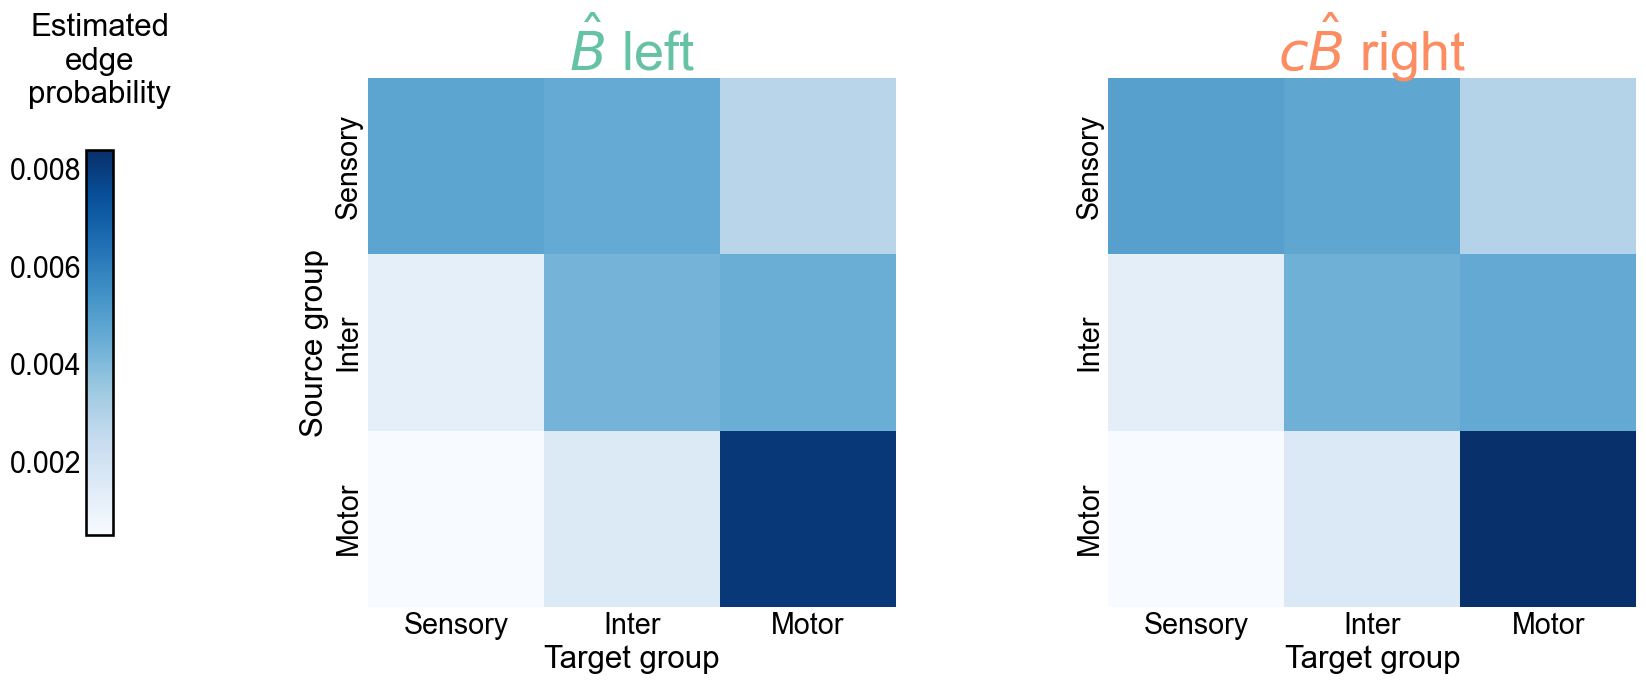

In [144]:
plot_stochastic_block_probabilities(misc_lr, network_palette, "left", "right")

In [145]:
lr_pvals = misc["corrected_pvalues"]
lr_pvals 

target,i,m,s
source,,,
i,0.238460,1.0,1.000000
m,1.000000,1.0,1.000000
s,0.849173,1.0,0.000493


In [146]:
names = ["Sensory", "Inter", "Motor"]

def convert_misc_format_pval(pval_df):
    zero_data = np.zeros(shape=(len(names), len(names)))
    pval_df_convert = pd.DataFrame(zero_data, columns=names, index=names)
    for i in range(len(pval_df)):
        for j in range(len(pval_df.columns)):
            pval_df_convert[names[i]][names[j]] = pval_df[names[i][0].lower()][names[j][0].lower()]
    
    return pval_df_convert

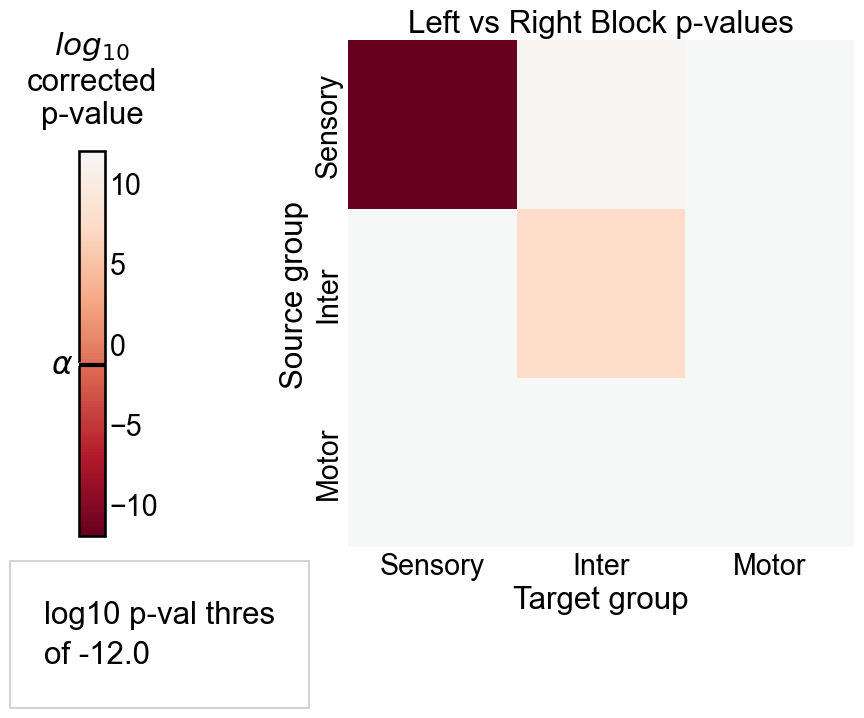

In [147]:
lr_df_convert = convert_misc_format_pval(lr_pvals)
plot_pvals(lr_df_convert, names, title="Left vs Right Block p-values", thres = thres)

(<Figure size 1000x1000 with 2 Axes>,
 <AxesSubplot:xlabel='Sorted group pairs', ylabel='$\\hat{p}_{left} - \\hat{p}_{right}$'>)

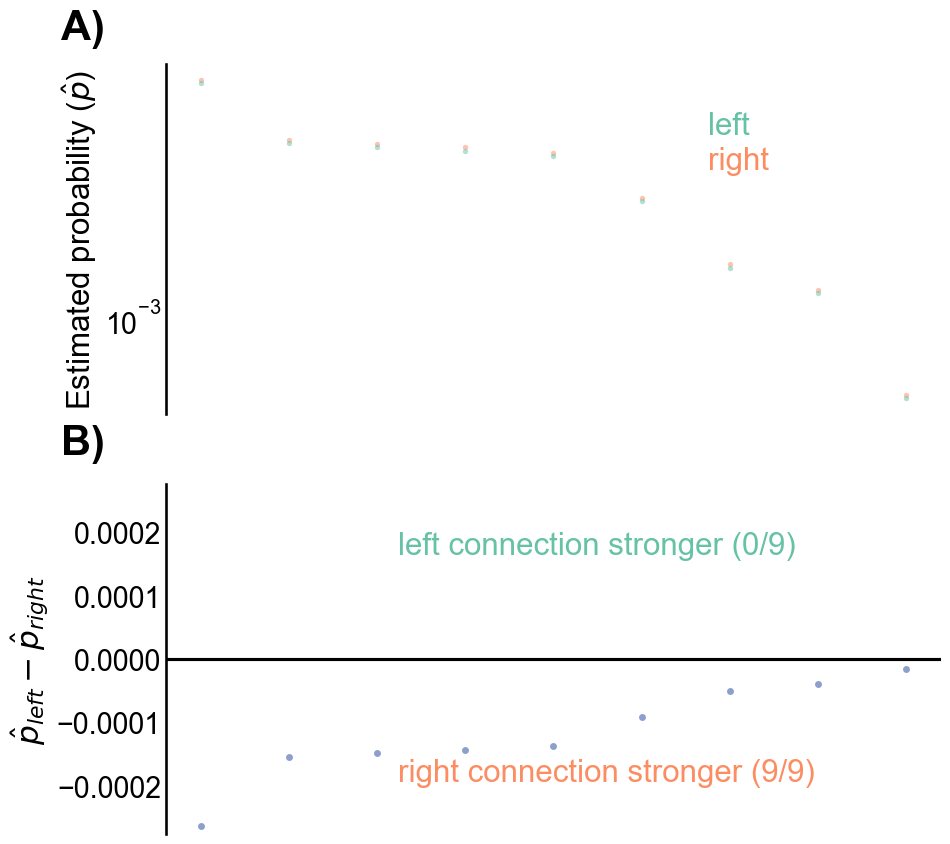

In [148]:
plot_estimated_probabilities(misc_lr, "left", "right")

head vs seg 1

In [149]:
np_head = np.array(head_adj)
np_seg1 = np.array(adj_1)
stat, pvalue, misc_h1 = group_connection_test(
    np_head,
    np_seg1,
    labels1=head_labels,
    labels2=labels_1,
    density_adjustment=True
)

In [150]:
#format B1 and B2
B1_h1, B2_h1 = convert_misc_format_prob(misc_h1)
misc_h1["probabilities1"] = B1_h1
misc_h1["probabilities2"] = B2_h1

(<Figure size 2000x1000 with 5 Axes>,
 array([<AxesSubplot:title={'center':'Estimated\nedge\nprobability'}>,
        <AxesSubplot:>,
        <AxesSubplot:title={'center':'$\\hat{B}$ head'}, xlabel='Target group', ylabel='Source group'>,
        <AxesSubplot:>,
        <AxesSubplot:title={'center':'$c$$\\hat{B}$ segment 1'}, xlabel='Target group'>],
       dtype=object))

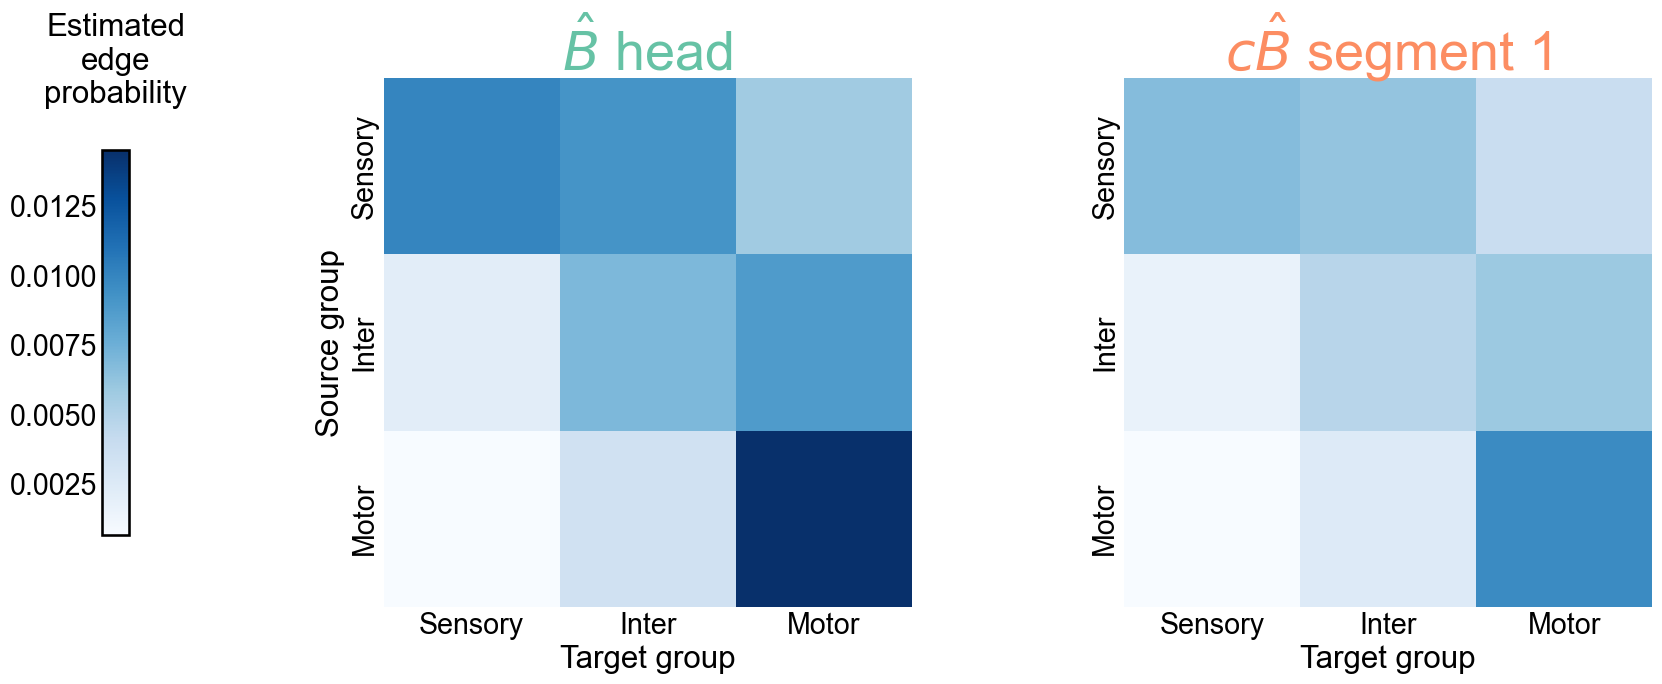

In [151]:
plot_stochastic_block_probabilities(misc_h1, network_palette, "head", "segment 1")

In [152]:
h1_pvals = misc_h1["corrected_pvalues"]
h1_pvals

target,i,m,s
source,,,
i,1.000000,6.133318e-18,0.398057
m,0.000130,9.548791e-07,1.000000
s,0.171149,2.071152e-03,1.000000


In [153]:
h1_pvals_conv = h1_pvals.copy()
for rowIndex, row in h1_pvals.iterrows(): #iterate over rows
    for columnIndex, value in row.items(): 
        if value < thres:
            print(h1_pvals_conv[rowIndex][columnIndex])
            h1_pvals_conv[columnIndex][rowIndex] = thres
h1_pvals_conv

0.00012997653889320764


target,i,m,s
source,,,
i,1.000000,1.000000e-12,0.398057
m,0.000130,9.548791e-07,1.000000
s,0.171149,2.071152e-03,1.000000


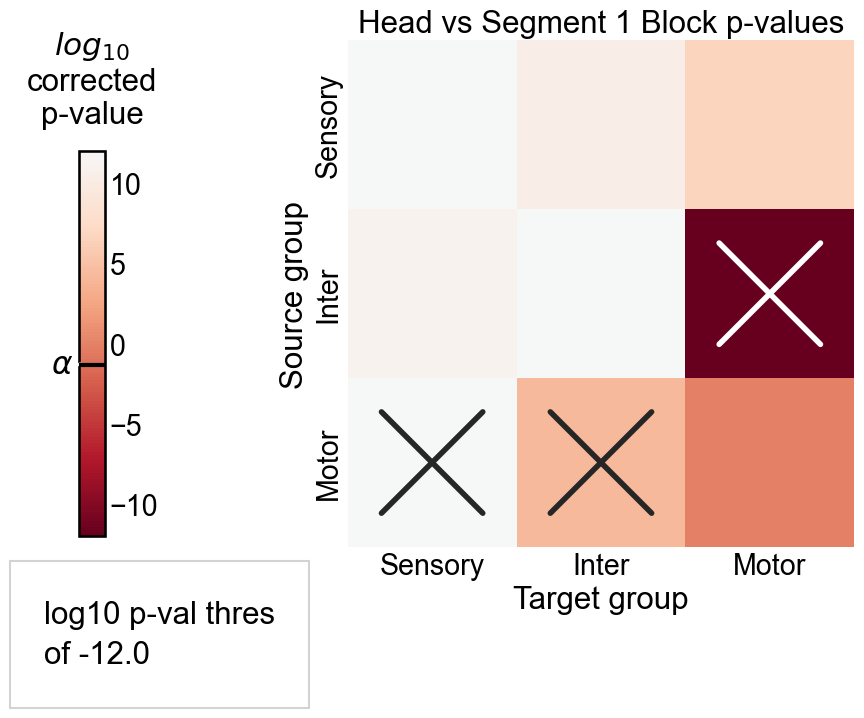

In [154]:
h1_df_convert = convert_misc_format_pval(h1_pvals_conv)
plot_pvals(h1_df_convert, names, title="Head vs Segment 1 Block p-values", thres=thres)

(<Figure size 1000x1000 with 2 Axes>,
 <AxesSubplot:xlabel='Sorted group pairs', ylabel='$\\hat{p}_{left} - \\hat{p}_{right}$'>)

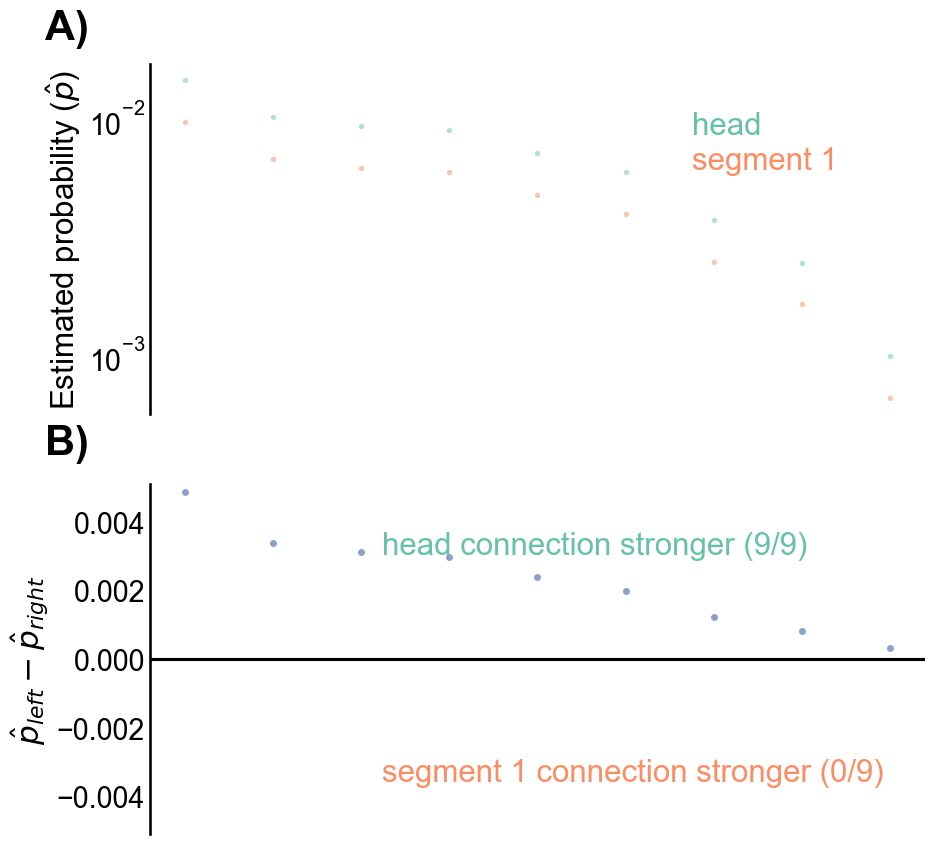

In [155]:
plot_estimated_probabilities(misc_h1, "head", "segment 1")

seg 1 vs seg 2

In [156]:
np_seg1 = np.array(adj_1)
np_seg2 = np.array(adj_2)
stat, pvalue, misc_12 = group_connection_test(
    np_seg1,
    np_seg2,
    labels1=labels_1,
    labels2=labels_2,
    density_adjustment=True
)

In [157]:
#format B1 and B2
B1_12, B2_12 = convert_misc_format_prob(misc_12)
misc_12["probabilities1"] = B1_12
misc_12["probabilities2"] = B2_12

(<Figure size 2000x1000 with 5 Axes>,
 array([<AxesSubplot:title={'center':'Estimated\nedge\nprobability'}>,
        <AxesSubplot:>,
        <AxesSubplot:title={'center':'$\\hat{B}$ segment 1'}, xlabel='Target group', ylabel='Source group'>,
        <AxesSubplot:>,
        <AxesSubplot:title={'center':'$c$$\\hat{B}$ segment 2'}, xlabel='Target group'>],
       dtype=object))

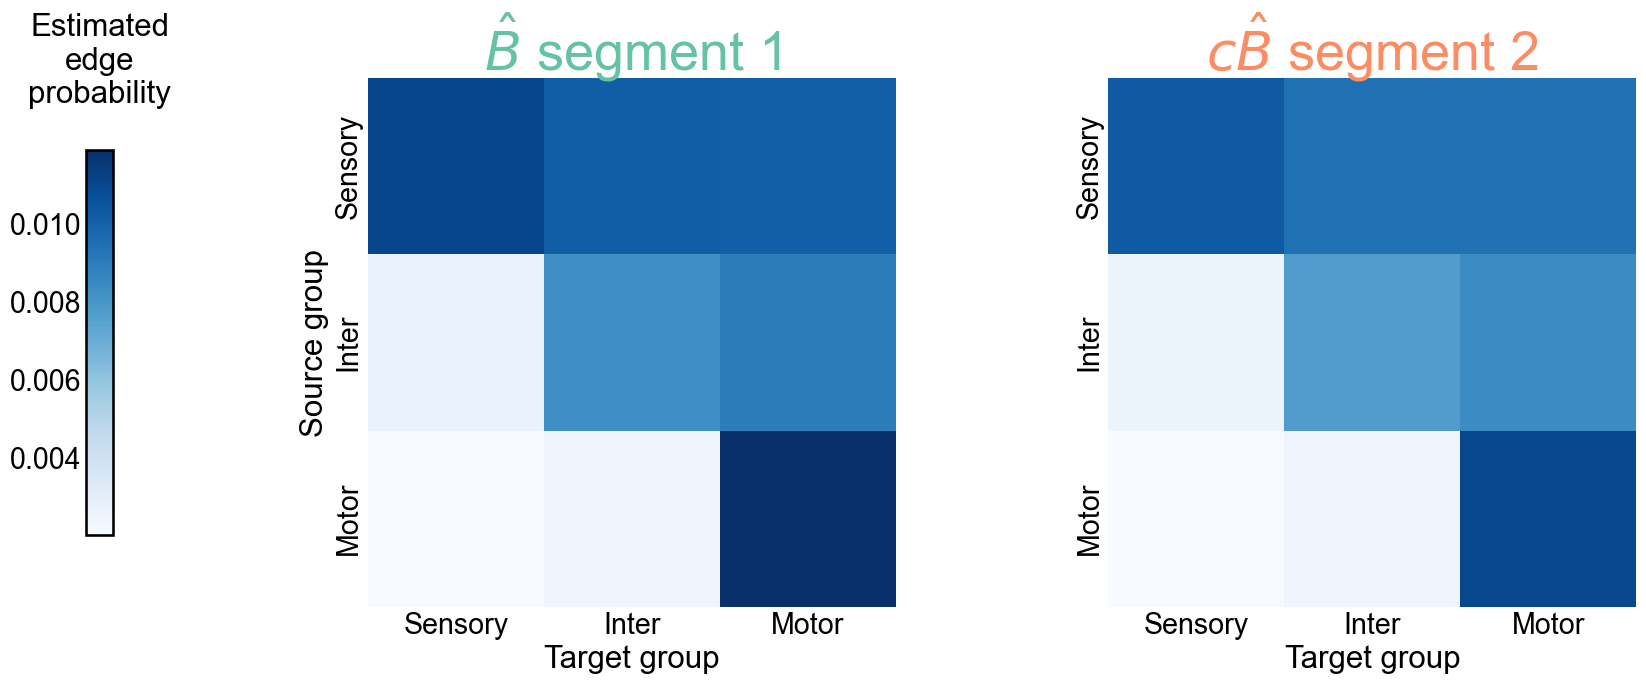

In [158]:
plot_stochastic_block_probabilities(misc_12, network_palette, "segment 1", "segment 2")

In [159]:
seg12_pvals = misc["corrected_pvalues"]
seg12_pvals

target,i,m,s
source,,,
i,0.238460,1.0,1.000000
m,1.000000,1.0,1.000000
s,0.849173,1.0,0.000493


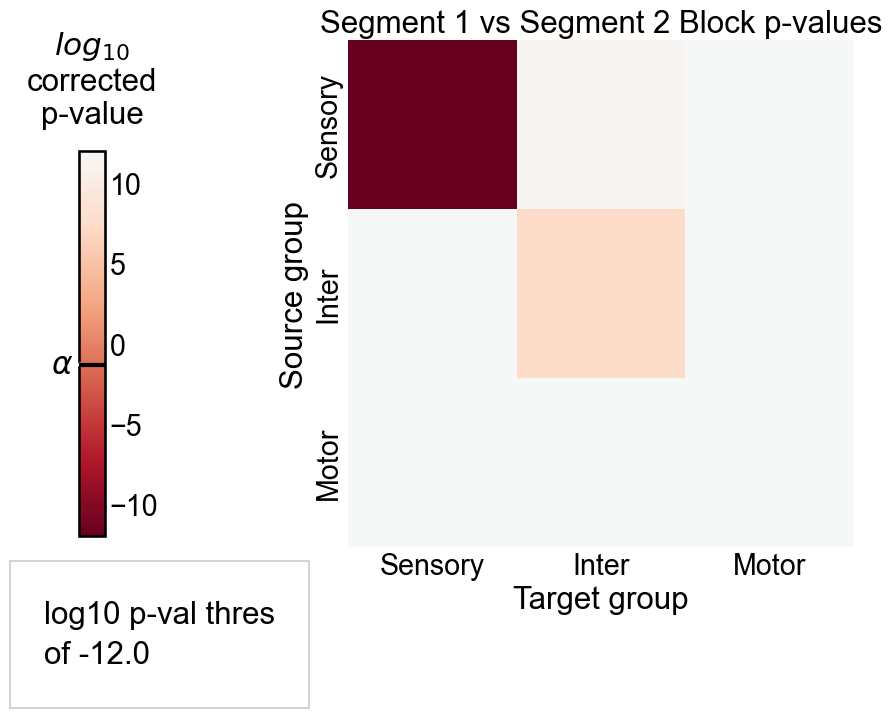

In [160]:
seg12_df_convert = convert_misc_format_pval(seg12_pvals)
plot_pvals(seg12_df_convert, names, title="Segment 1 vs Segment 2 Block p-values", thres=thres)

(<Figure size 1000x1000 with 2 Axes>,
 <AxesSubplot:xlabel='Sorted group pairs', ylabel='$\\hat{p}_{left} - \\hat{p}_{right}$'>)

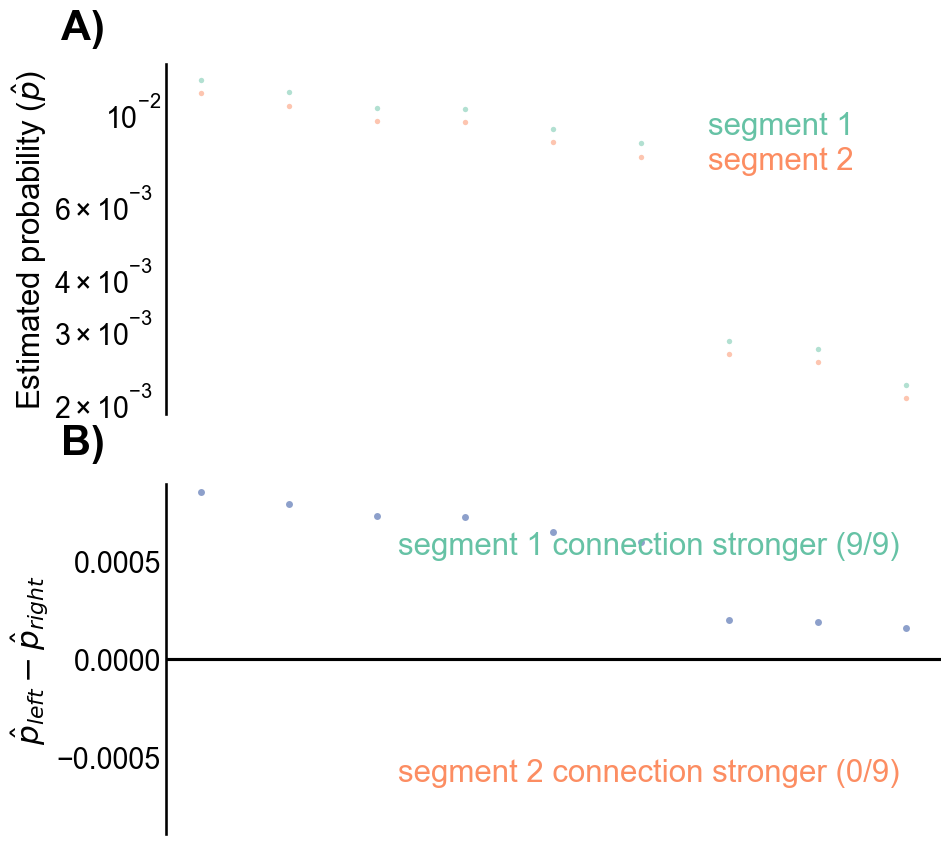

In [161]:
plot_estimated_probabilities(misc_12, "segment 1", "segment 2")

Fix colorbar everywhere (all heatmaps of pvalues in density/sbms)

Graph Matching:
Use weighted networks
param n_init: governs how many restarts to do
compute an accuracy compared to what nadine said
try in segment 1 vs segment 2
